In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = '/content/drive/MyDrive/ML/Linear Regression/USA_Housing.csv'
df = pd.read_csv(file_path)
print("Dataset Load successfully")

Dataset Load successfully


In [4]:
print('Dataset Preview: ')
print(df.head())

print("\nColumns Names: ")
print(df.columns)

Dataset Preview: 
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, C

In [5]:
df.dtypes

,0
Avg. Area Income,float64
Avg. Area House Age,float64
Avg. Area Number of Rooms,float64
Avg. Area Number of Bedrooms,float64
Area Population,float64
Price,float64
Address,object


In [6]:
print(df.isnull().sum())

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


In [ ]:
# fill the ex_showroom_price
df['ex_showroom_price'] = df['ex_showroom_price'].fillna(df['ex_showroom_price'].median())

print(df.isnull().sum())

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


In [7]:
# Select numeric columns for regression
numeric_cols = df.select_dtypes(include =['int64', 'float64']).columns.tolist()
print(numeric_cols)

['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price']


In [9]:
# Define Feature (X) and Target (Y)
# i pick the one column for above for independent variable because i used simple linear regression
X = df[['Avg. Area Income']]
Y = df[['Price']]


## Split Data into Training and Testing sets

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

## Create and Train linear Regression Model

In [11]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

## Predict on Test Data and Calculate MSE

In [12]:
from sklearn.metrics import mean_squared_error

# predication
Y_pred = model.predict(X_test)

# calculate the mse
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 71606719101.03638


## Plot Regression line

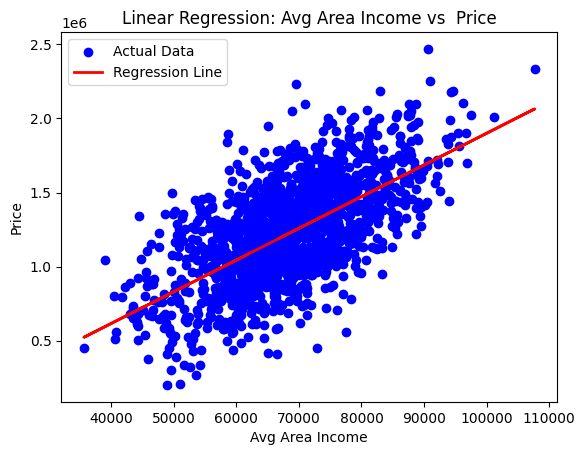

In [17]:
plt.scatter(X_test, Y_test, color='blue', label='Actual Data')
plt.plot(X_test, Y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Avg Area Income')
plt.ylabel('Price')
plt.title('Linear Regression: Avg Area Income vs  Price')
plt.legend()
plt.show()


## Here Comparsion of Actual value and Predicted values

In [14]:
import numpy as np
results = np.column_stack((Y_test,Y_pred))

print("Actual Values | Predicted Values")
print("---------------------------------")
for actual, predicted in results:
    print(f"{actual:14.2f} | {predicted:12.2f} ")

Actual Values | Predicted Values
---------------------------------
    1339096.08 |   1085358.92 
    1251794.18 |    983853.71 
    1340094.97 |   1262464.24 
    1431507.62 |   1243777.03 
    1042373.52 |   1322346.42 
    1555320.50 |   1442990.02 
    1250882.29 |    903852.16 
    1039380.72 |   1041727.34 
     832475.19 |    868132.19 
    1420648.28 |   1465563.27 
     613788.32 |   1041702.13 
    1702406.04 |   1185147.76 
     913587.10 |    855236.20 
    1675557.27 |   1261176.32 
    1279160.99 |   1150578.88 
     949684.41 |    992577.58 
    1372994.29 |   1115655.91 
    1148563.90 |   1126640.73 
     846939.43 |    997850.82 
    1002192.58 |   1224781.86 
    1072253.83 |   1242069.47 
     973197.78 |    992933.11 
    1538985.19 |   1391477.29 
    1135079.35 |   1294101.07 
    1618721.14 |   1390676.48 
    1158742.83 |   1132557.42 
    1268421.10 |    891486.86 
     985749.79 |   1133535.66 
     709348.22 |   1389198.33 
    1869313.11 |   1444151.43 
   

In [15]:
# display model coefficients
# display model coefficients
print("Model Coefficients: ")
print(f"Intercept:  {model.intercept_}")
print(f"Slope :  {model.coef_[0]}")

Model Coefficients: 
Intercept:  [-238303.46376374]
Slope :  [21.38126053]


## Predict for new data

In [18]:

# New data for prediction
new_income_data = pd.DataFrame({'Avg. Area Income': [30000, 60000, 90000]})

# Predicting using the trained model
predicted_prices = model.predict(new_income_data)

# Display results
print("Predicted House Price for New Avg. Area Income:")
for income, price in zip(new_income_data['Avg. Area Income'], predicted_prices):
    print(f"Avg. Area Income: {income} - Predicted House Price: {price}")


Predicted House Price for New Avg. Area Income:
Avg. Area Income: 30000 - Predicted House Price: [403134.35208922]
Avg. Area Income: 60000 - Predicted House Price: [1044572.16794218]
Avg. Area Income: 90000 - Predicted House Price: [1686009.98379513]
